In [117]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [120]:
data = pd.read_excel("C:\\Users\\yyash\\Downloads\\project3 (1) (1).xlsx")

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32109 entries, 0 to 32108
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bounces          32109 non-null  int64  
 1   Exits            32109 non-null  int64  
 2   Continent        32109 non-null  object 
 3   Sourcegroup      32109 non-null  object 
 4   Timeinpage       32109 non-null  int64  
 5   Uniquepageviews  32109 non-null  int64  
 6   Visits           32109 non-null  int64  
 7   BouncesNew       32109 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 2.0+ MB


In [122]:
data.count() # gives  the count of all non null values

Bounces            32109
Exits              32109
Continent          32109
Sourcegroup        32109
Timeinpage         32109
Uniquepageviews    32109
Visits             32109
BouncesNew         32109
dtype: int64

In [138]:
data.describe()

,Bounces,Exits,Timeinpage,Uniquepageviews,Visits,BouncesNew
count,32109.000000,32109.000000,32109.000000,32109.000000,32109.000000,32109.000000
mean,0.713009,0.906039,73.184746,1.114329,0.906039,0.007130
std,0.708215,0.695819,394.441111,0.614880,0.730068,0.007082
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,0.010000
75%,1.000000,1.000000,10.000000,1.000000,1.000000,0.010000
max,30.000000,36.000000,46745.000000,45.000000,45.000000,0.300000


### task 2 unique page view value depends on visits

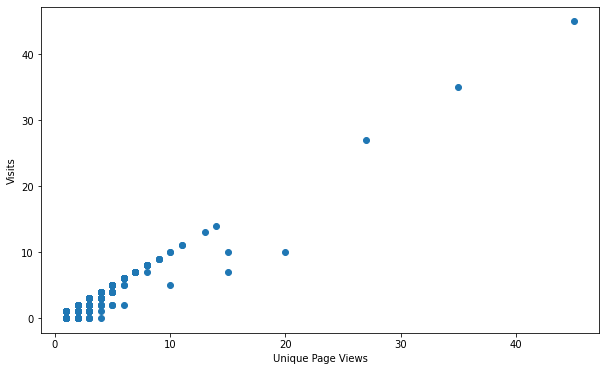

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['Uniquepageviews'],y=data['Visits'])
plt.xlabel('Unique Page Views')
plt.ylabel('Visits')
plt.show()

In [141]:
#seeing data correlation
corr_matrix = data.corr()
print(corr_matrix)
data['Uniquepageviews'].corr(data['Visits'])

                  Bounces     Exits  Timeinpage  Uniquepageviews    Visits  \
Bounces          1.000000  0.824912   -0.109106         0.659101  0.819343   
Exits            0.824912  1.000000    0.001325         0.791129  0.800979   
Timeinpage      -0.109106  0.001325    1.000000         0.114593  0.066650   
Uniquepageviews  0.659101  0.791129    0.114593         1.000000  0.814446   
Visits           0.819343  0.800979    0.066650         0.814446  1.000000   
BouncesNew       1.000000  0.824912   -0.109106         0.659101  0.819343   

                 BouncesNew  
Bounces            1.000000  
Exits              0.824912  
Timeinpage        -0.109106  
Uniquepageviews    0.659101  
Visits             0.819343  
BouncesNew         1.000000  


0.8144457070735213

### task 3 affect the exits

In [126]:
 # task 3
correlation_matrix = data.corr()
exit_correlation = correlation_matrix['Exits']
print(exit_correlation)

Bounces            0.824912
Exits              1.000000
Timeinpage         0.001325
Uniquepageviews    0.791129
Visits             0.800979
BouncesNew         0.824912
Name: Exits, dtype: float64


In [127]:
continent_exit_avg = data.groupby('Continent')['Exits'].mean()
sourcegroup_exit_avg = data.groupby('Sourcegroup')['Exits'].mean()

# Display the results
print(continent_exit_avg)
print(sourcegroup_exit_avg)

Continent
AF           0.884735
AS           0.908546
EU           0.898145
N.America    0.908846
OC           0.902655
SA           0.903743
Name: Exits, dtype: float64
Sourcegroup
(direct)                      1.016861
Others                        0.833022
facebook                      1.076087
google                        0.939179
public.tableausoftware.com    0.647710
reddit.com                    0.943182
t.co                          0.928857
tableausoftware.com           0.737437
visualisingdata.com           0.738730
Name: Exits, dtype: float64


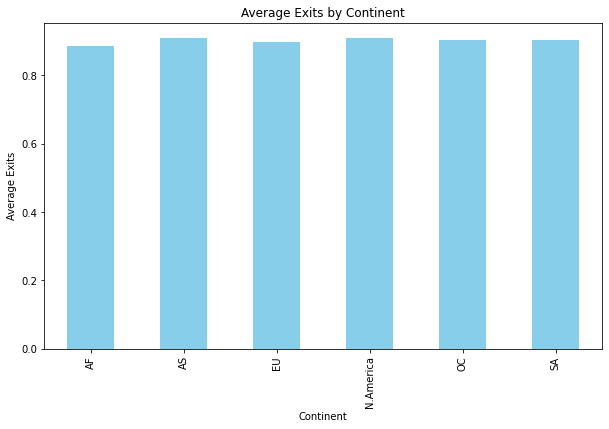

In [139]:
# Plot exits by continent
continent_exit_avg = data.groupby('Continent')['Exits'].mean()
sourcegroup_exit_avg = data.groupby('Sourcegroup')['Exits'].mean()

plt.figure(figsize=(10, 6))
continent_exit_avg.plot(kind='bar', color='skyblue')
plt.title('Average Exits by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Exits')
plt.show()

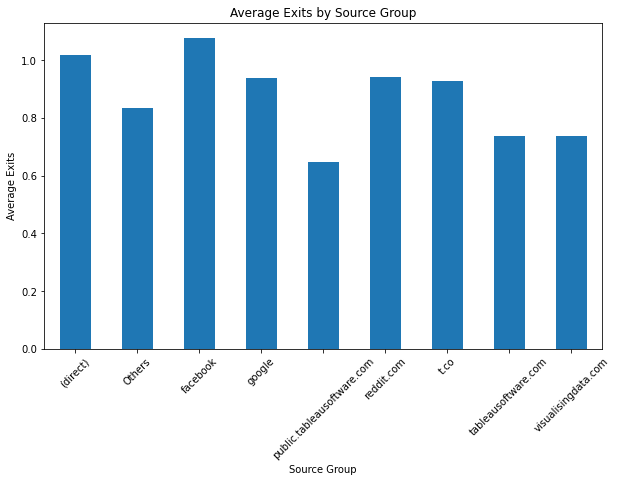

In [131]:
# Plot exits by source group
plt.figure(figsize=(10, 6))
sourcegroup_exit_avg.plot(kind='bar')
plt.title('Average Exits by Source Group')
plt.xlabel('Source Group')
plt.ylabel('Average Exits')
plt.xticks(rotation=45)
plt.show()


### Task 4 effect on the time on page

In [67]:
#task 4
# Calculate correlation matrix
correlation_matrix = data.corr()
time_on_page_correlation = correlation_matrix['Timeinpage']
print(time_on_page_correlation)

Bounces           -0.109106
Exits              0.001325
Timeinpage         1.000000
Uniquepageviews    0.114593
Visits             0.066650
BouncesNew        -0.109106
Name: Timeinpage, dtype: float64


In [69]:
# Group by Continent and Sourcegroup, and calculate the average time on page
continent_time_avg = data.groupby('Continent')['Timeinpage'].mean()
sourcegroup_time_avg = data.groupby('Sourcegroup')['Timeinpage'].mean()

print(continent_time_avg)
print(sourcegroup_time_avg)


Continent
AF            55.227414
AS            60.848944
EU            60.364142
N.America     77.560744
OC            66.235251
SA           139.422460
Name: Timeinpage, dtype: float64
Sourcegroup
(direct)                       70.708178
Others                         70.377239
facebook                       57.206522
google                         67.314070
public.tableausoftware.com    134.321270
reddit.com                     49.198052
t.co                           69.923522
tableausoftware.com            90.845896
visualisingdata.com            73.274590
Name: Timeinpage, dtype: float64


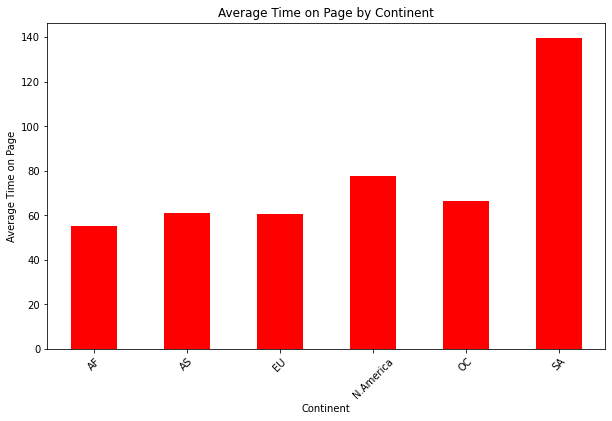

In [106]:
# Plot time on page by continent
plt.figure(figsize=(10, 6))
continent_time_avg.plot(kind='bar', color='red')
plt.title('Average Time on Page by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Time on Page')
plt.xticks(rotation=45)
plt.show()


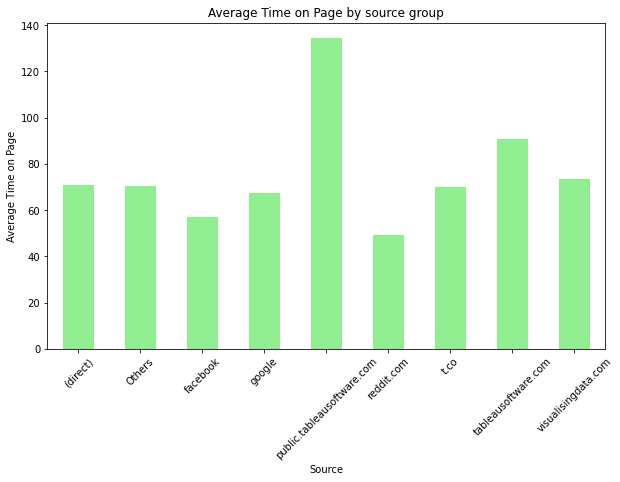

In [134]:
plt.figure(figsize=(10, 6))
sourcegroup_time_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Time on Page by source group')
plt.xlabel('Source')
plt.ylabel('Average Time on Page')
plt.xticks(rotation=45)
plt.show()

### TASK 5 

In [79]:

correlation_matrix = data.corr()

# Focus on Bounces and find its correlation with other variables
bounce_correlation = correlation_matrix['Bounces']
print(bounce_correlation)


Bounces            1.000000
Exits              0.824912
Timeinpage        -0.109106
Uniquepageviews    0.659101
Visits             0.819343
BouncesNew         1.000000
Name: Bounces, dtype: float64


In [80]:

continent_bounce_avg = data.groupby('Continent')['Bounces'].mean()
sourcegroup_bounce_avg = data.groupby('Sourcegroup')['Bounces'].mean()

print(continent_bounce_avg)
print(sourcegroup_bounce_avg)


Continent
AF           0.719626
AS           0.731000
EU           0.713447
N.America    0.707878
OC           0.740413
SA           0.717914
Name: Bounces, dtype: float64
Sourcegroup
(direct)                      0.832315
Others                        0.636754
facebook                      0.913043
google                        0.756455
public.tableausoftware.com    0.333087
reddit.com                    0.803571
t.co                          0.766118
tableausoftware.com           0.505444
visualisingdata.com           0.533811
Name: Bounces, dtype: float64


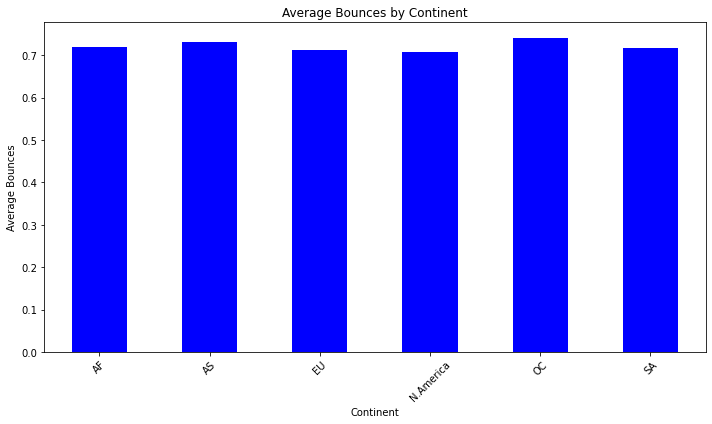

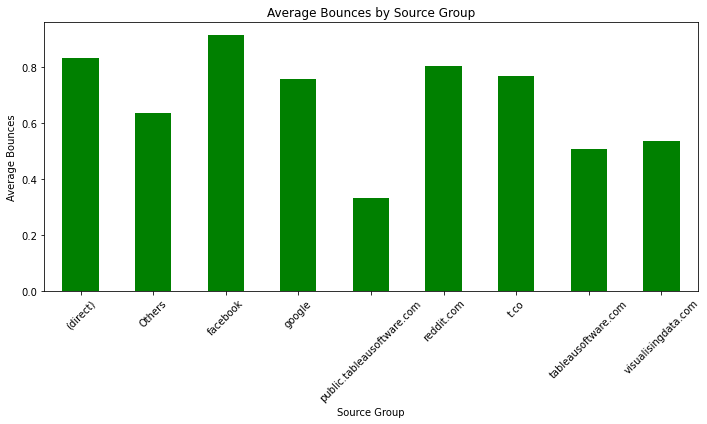

In [82]:
# Plot bounces by continent
plt.figure(figsize=(10, 6))
continent_bounce_avg.plot(kind='bar', color='blue')
plt.title('Average Bounces by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Bounces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot bounces by source group
plt.figure(figsize=(10, 6))
sourcegroup_bounce_avg.plot(kind='bar', color='green')
plt.title('Average Bounces by Source Group')
plt.xlabel('Source Group')
plt.ylabel('Average Bounces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
